<a href="https://colab.research.google.com/github/Musaddiq98/Data-Science-Assignments/blob/main/Forecasting_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airlines Passengers data set**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt
from pandas import Grouper
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.simplefilter("ignore")

In [ ]:
ad = pd.read_excel('Airlines+Data (1).xlsx',header=0,parse_dates=True)


In [ ]:
ad

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
ad.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [ ]:
ad.tail(4)

,Month,Passengers
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
ad.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
ad.set_index('Month',inplace=True)
## making the month column as index

In [ ]:
ad

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
ad.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [ ]:
ad.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
ad[ad.duplicated()].shape

(16, 1)

In [ ]:
ad.drop_duplicates(inplace=True)

In [ ]:
AD = ad.copy()

In [ ]:
AD.isnull().sum()

Passengers    0
dtype: int64

<AxesSubplot:xlabel='Month'>

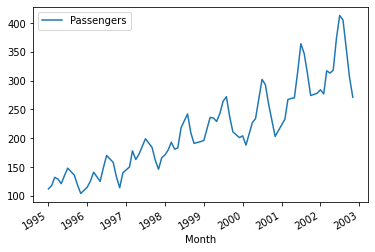

In [ ]:
## Visualization of Data Checking the line plot,Histogram and Density Plots,create a density plot,
## Box and Whisker Plots by Interval,Lag Plot, Autocorrelation Plot
AD.plot()
## here we can say that the trend is upward and the sessionality is multiplicative



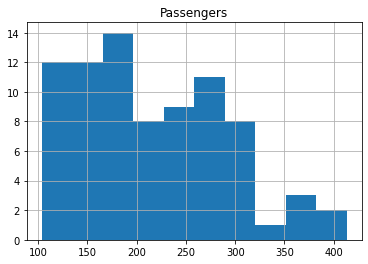

In [ ]:
##Histogram and Density Plots

AD.hist()
plt.show()

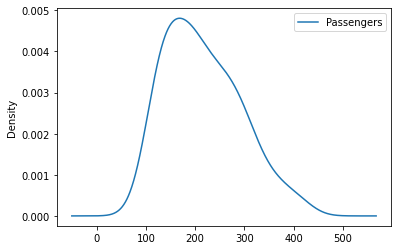

In [ ]:
# create a density plot
AD.plot(kind='kde')
plt.show()

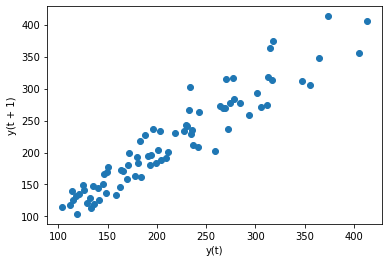

In [ ]:
##Lag_plot
lag_plot(AD,lag=1)
plt.show()

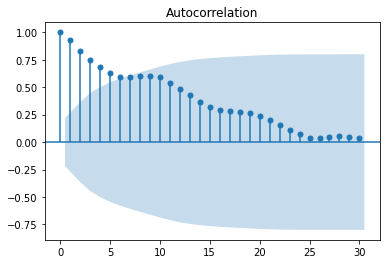

In [ ]:
#Autocorrelation Plot

plot_acf(AD,lags=30)
plt.show()

In [ ]:
upsampled = AD.resample('M').mean()
print(upsampled.head(15))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


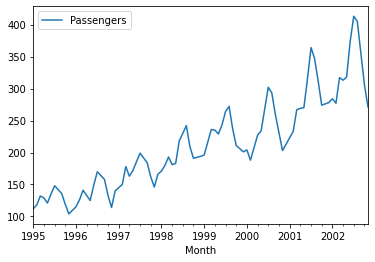

In [ ]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [ ]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


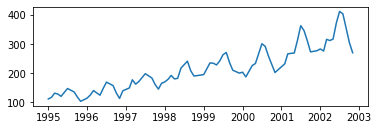

In [ ]:
# line plot
plt.subplot(211)
plt.plot(AD)

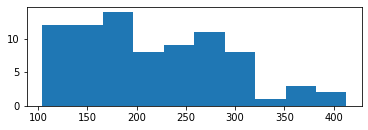

In [ ]:
# histogram
plt.subplot(212)
plt.hist(AD)
plt.show()

# Square Root Transform

In [ ]:
dataframe = DataFrame(AD.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

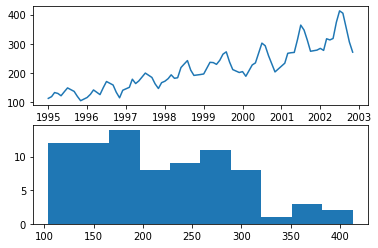

In [ ]:
# line plot
plt.subplot(211)
plt.plot(AD['Passengers'])
# histogram
plt.subplot(212)
plt.hist(AD['Passengers'])
plt.show()

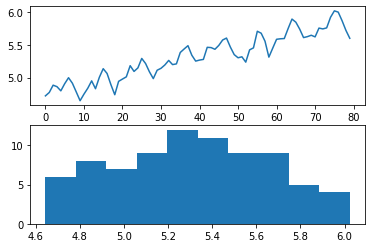

In [ ]:
from numpy import log
dataframe = DataFrame(AD.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [ ]:
Train = interpolated.head(81)
Test = interpolated.tail(14)

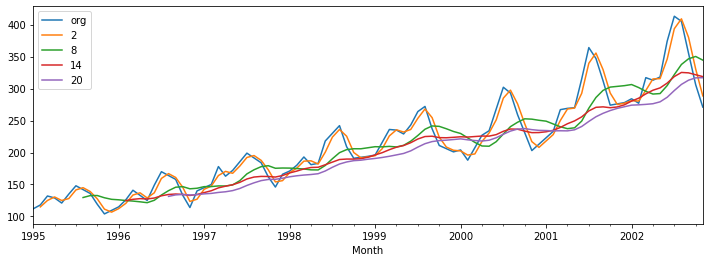

In [ ]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

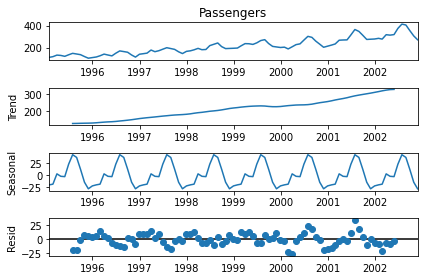

In [ ]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

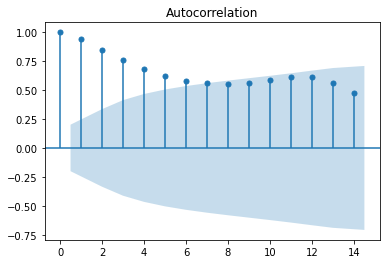

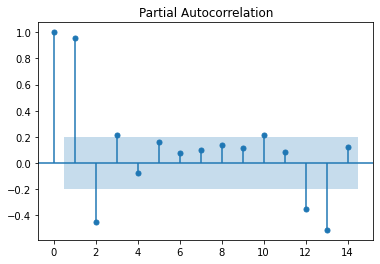

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

# Evaluation Metric MAPE

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.18163872245304

## Holt Method

In [ ]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

12.424433039859505

Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

3.5137258177840023

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.233265366770187

In [ ]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

12.632691622843218

## Final Model by combining train and test

In [ ]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()


In [ ]:
#Forecasting for next 12 time periods
hwe_model_add_add.forecast(12)

2002-12-31    276.997396
2003-01-31    285.745753
2003-02-28    287.583200
2003-03-31    293.687228
2003-04-30    294.427661
2003-05-31    293.852289
2003-06-30    289.747255
2003-07-31    288.176835
2003-08-31    290.732858
2003-09-30    290.991203
2003-10-31    296.874999
2003-11-30    305.623357
Freq: M, dtype: float64

In [ ]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [ ]:
interpolated.reset_index(inplace=True)

In [ ]:
interpolated['t'] = 1
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [ ]:
for i,row in interpolated.iterrows():
    interpolated['t'].iloc[i] = i+1

In [ ]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [ ]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values

In [ ]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [ ]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [ ]:
months = pd.get_dummies(interpolated['month']) ## converting the dummy variables for month column
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable

In [ ]:
Airlines = pd.concat([interpolated,months],axis=1)

In [ ]:
Airlines.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<AxesSubplot:xlabel='month', ylabel='year'>

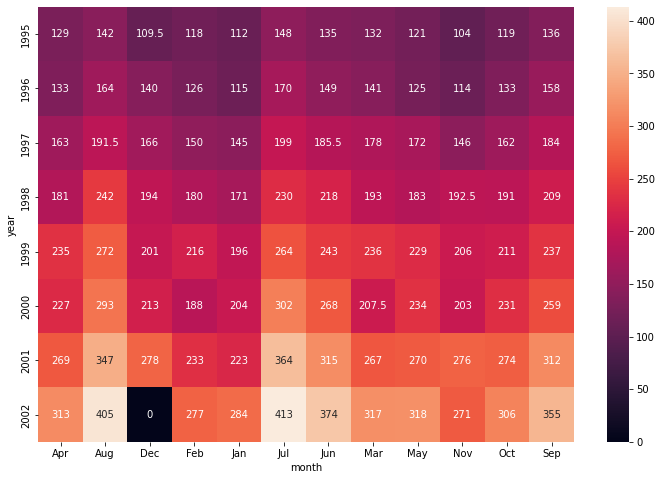

In [ ]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

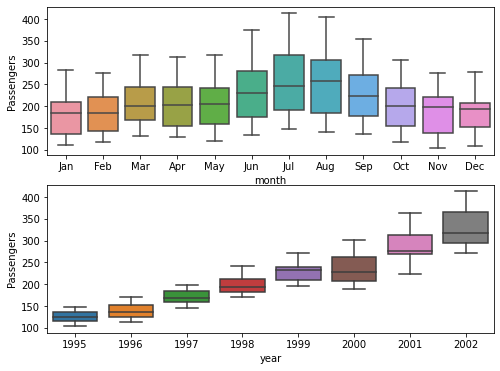

In [ ]:
# Boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

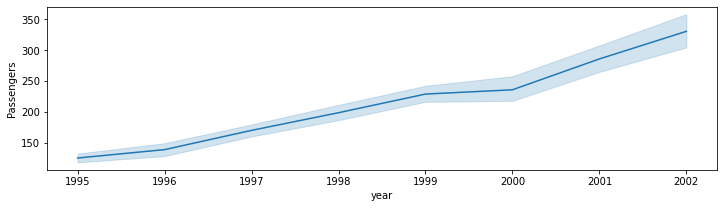

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

Splitting Data

In [ ]:
Train = Airlines.head(-12) # training data
Test = Airlines.tail(12) # test Data

In [ ]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

52.0827127463409

In [ ]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

44.75522036534949

In [ ]:
#Quadratic

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.53659520626263

In [ ]:
#Additive seasonality

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

131.84713805109237

In [ ]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

27.48773224798711

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

139.14350715571635

In [ ]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.838051855781133

In [ ]:
#Compareing the results

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.838052
4,rmse_add_sea_quad,27.487732
1,rmse_Exp,44.755220
2,rmse_Quad,46.536595
0,rmse_linear,52.082713
3,rmse_add_sea,131.847138
5,rmse_Mult_sea,139.143507


**Multiplicative Additive Seasonality will be preffered to any other model in this analysis**